In [49]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#Reading in Loss/Accuracy Metrics from models across training epochs
#Note: The output for these files is within the model_evaluation folder
language_code = 'ar'
language = 'Arabic'
df = pd. read_excel (r'model_evaluation/train_validate_configuration_1.xlsx', sheet_name= language_code)
df2 = pd. read_excel (r'model_evaluation/train_validate_configuration_2.xlsx', sheet_name=language_code)

In [143]:
# Data Processing output from Models in excel spreadsheets
# Look at all those lists.....X_X
train_loss = []
train_loss2 = []
train_acc = []
train_acc2=[]
val_loss = []
val_loss2 = []
val_acc = []
val_acc2=[]

def p2f(x):
    return float(x.strip('%'))/100

def split_rows(string, row, loss_list, accuracy_list):
    
    if string in row:
        loss = row.split('|')[0]
        loss = loss.split(':')[1]
        loss = p2f(loss)
        loss_list.append(loss)
        acc= acc_loss.split('|')[1]
        acc = acc.split(':')[1]
        acc = p2f(acc)
        accuracy_list.append(acc)
        
    
for row, idx in df.iterrows():
    acc_loss = idx[1]
    if isinstance(acc_loss, str):
        split_rows("Train", acc_loss, train_loss, train_acc)
        split_rows("Val.", acc_loss, val_loss, val_acc)
        
        
for row, idx in df2.iterrows():
    acc_loss = idx[1]
    if isinstance(acc_loss, str):
        split_rows("Train", acc_loss, train_loss2, train_acc2)
        split_rows("Val.", acc_loss, val_loss2, val_acc2)
        

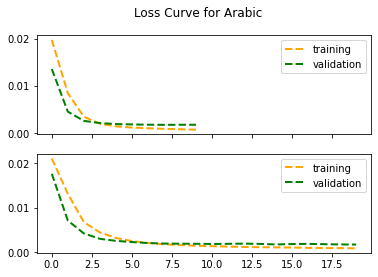

In [144]:
#Graph Visualization for Loss Rate Across Epochs
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Loss Curve for {}'.format(language))
ax1.plot(list(range(0, (len(train_loss)))), train_loss, color='orange', label = 'training', linestyle='dashed',
     linewidth=2, markersize=12)
ax1.plot(list(range(0, (len(val_loss)))), val_loss, color='green', label = 'validation', linestyle='dashed',
     linewidth=2, markersize=12)
ax1.legend()
ax2.plot(list(range(0, (len(train_loss2)))), train_loss2, color='orange', label = 'training', linestyle='dashed',
     linewidth=2, markersize=12)
ax2.plot(list(range(0, (len(val_loss2)))), val_loss2, color='green', label = 'validation', linestyle='dashed',
     linewidth=2, markersize=12)
ax2.legend()
fig.savefig('model_evaluation/loss_curve_{}.png'.format(language))